# Model Development

<p>In this notebook, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

### Setup

We will start with importing necessary libraries and loading the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('automobileEDA.csv')

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is:</p>


<b>Simple Linear Regression</b>


<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>

<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>



<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$



<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


### Let's load the modules for linear regression:

In [5]:
from sklearn.linear_model import LinearRegression

### Create the linear regression object:

In [7]:
lm = LinearRegression()
lm

LinearRegression()

### How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [17]:
x = df[['highway-mpg']]
y = df['price']

Fit the linear model using 'highway-mpg':

In [18]:
lm.fit(x , y)

LinearRegression()

We can output a prediction:

In [20]:
yhat = lm.predict(x)
yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h3>What is the value of the intercept (a)?</h3>

In [21]:
lm.intercept_

38423.3058581574

<h3>What is the value of the slope (b)?</h3>

In [22]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

**Price** = 38423.31 - 821.73 * **highway-mpg**


<h4>Multiple Linear Regression</h4>

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response\ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>From the previous notebook when we performed exploratory analysis we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [29]:
X = df[['horsepower' ,  'curb-weight' ,'engine-size'  , 'highway-mpg']]

In [30]:
lm.fit(X , y)

LinearRegression()

<h3>What is the value of the intercept (a)?</h3>

In [31]:
lm.intercept_

-15806.62462632923

<h3>What are the values of the coefficients (b1, b2, b3, b4)? </h3>

In [32]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15806.62462632918 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

<h2>2. Model Evaluation Using Visualization</h2>

Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

### Regression Plot 

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

Let's visualize **highway-mpg** as potential predictor variable of price:

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

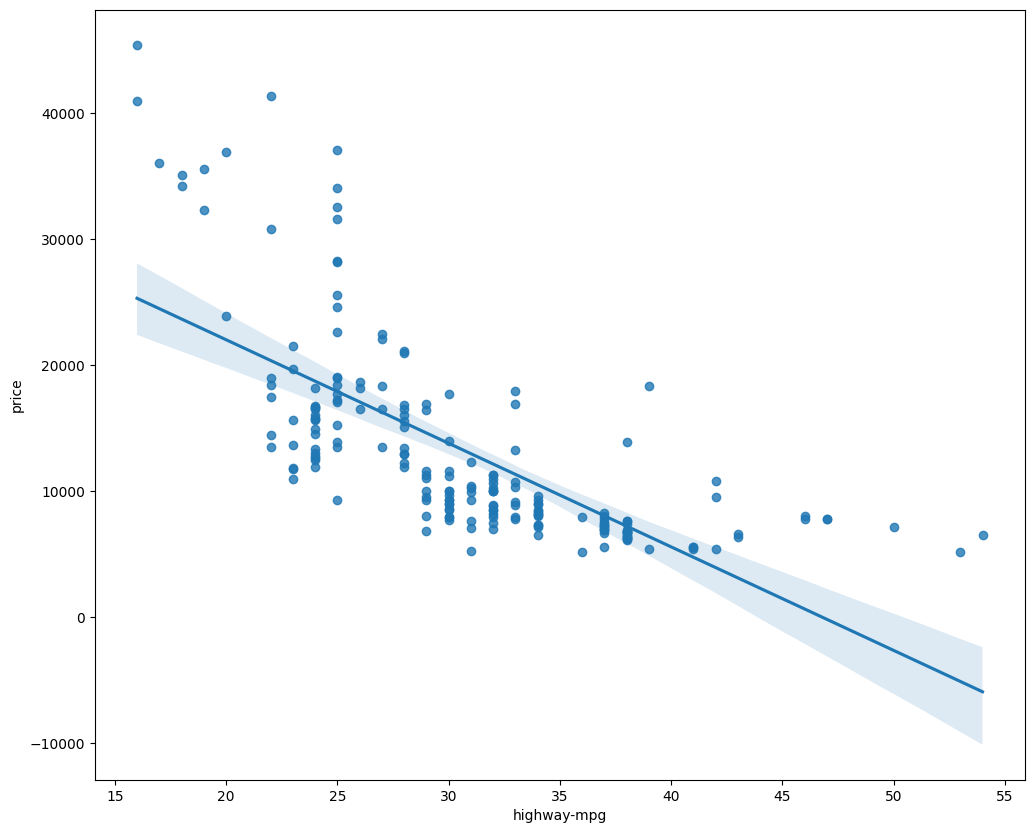

In [34]:
plt.figure(figsize = (12 , 10))
sns.regplot(data = df , x = 'highway-mpg' , y = 'price')

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

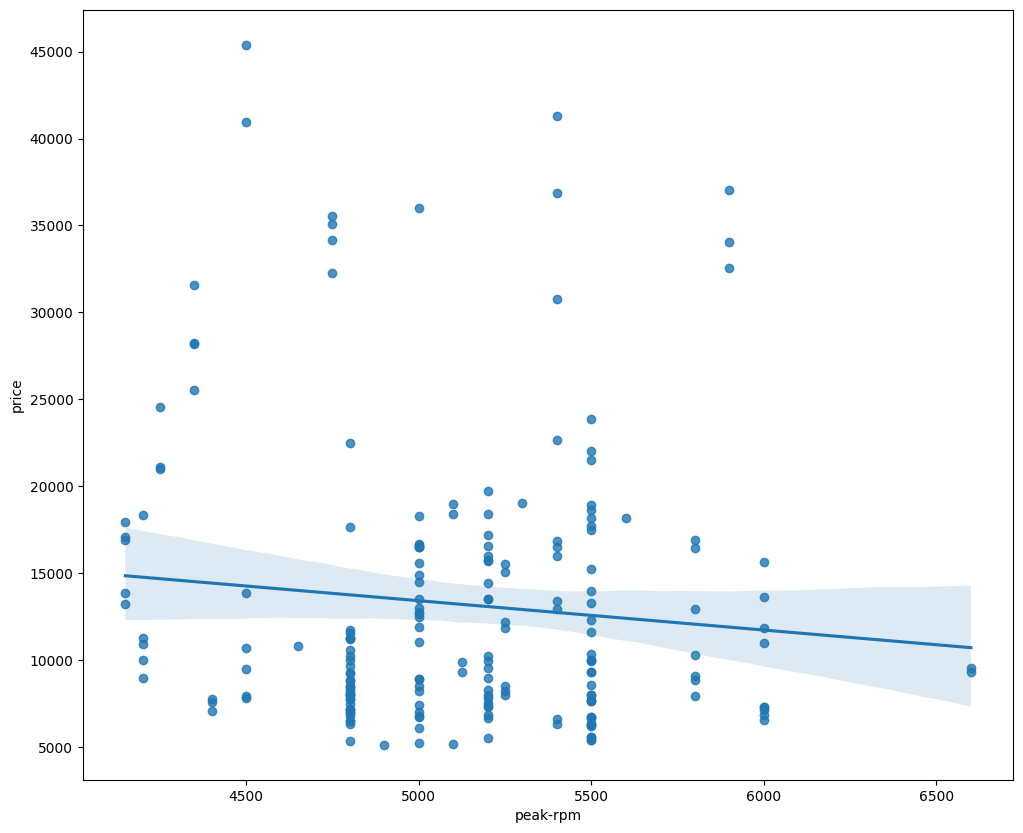

In [36]:
plt.figure(figsize = (12 , 10))
sns.regplot(data = df , x = 'peak-rpm' , y = 'price')

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases

Comparing the correlations:

In [38]:
df[['highway-mpg' , 'peak-rpm' , 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

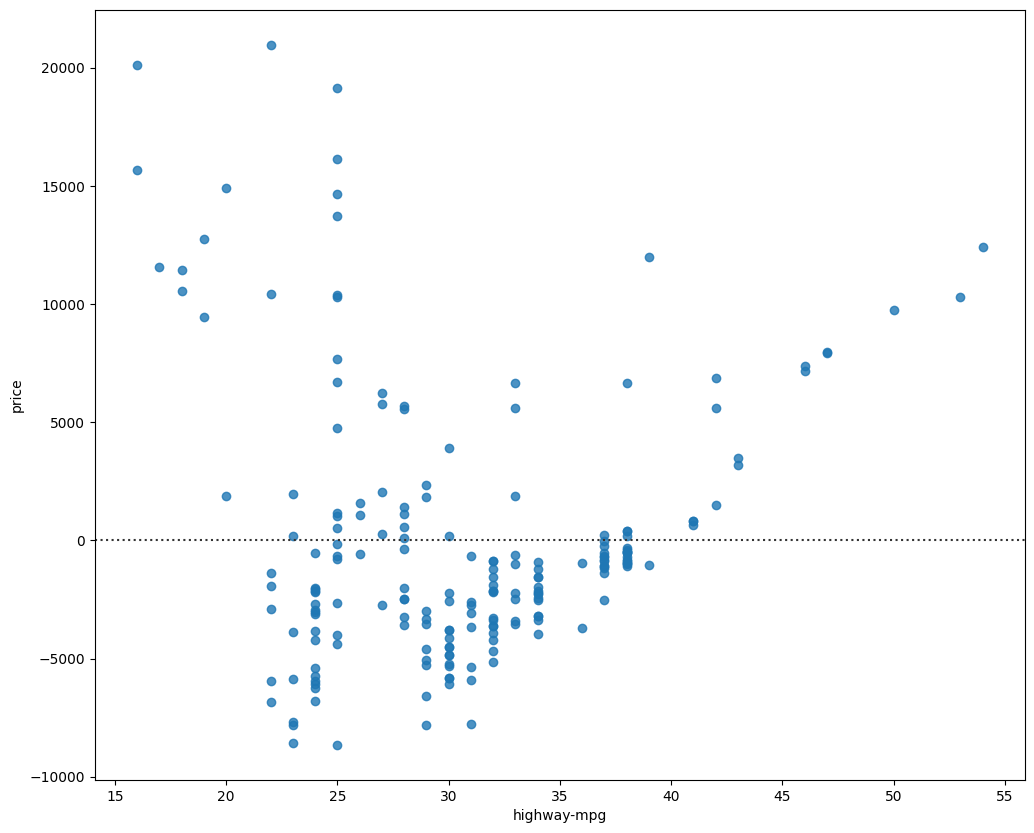

In [40]:
plt.figure(figsize = (12 , 10))
sns.residplot(x = df['highway-mpg'] , y = df['price'])
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [41]:
Y_hat = lm.predict(X)

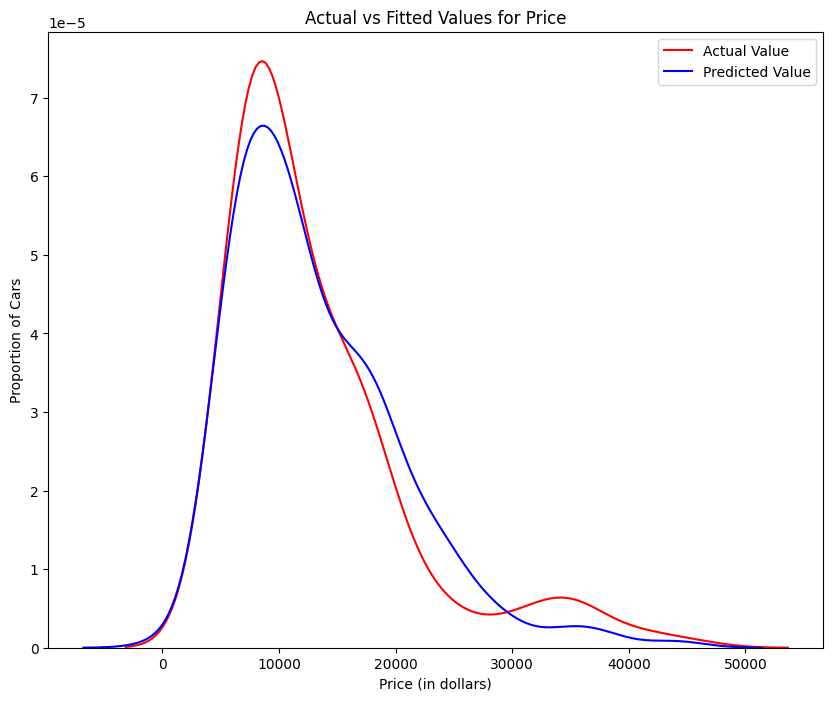

In [50]:
plt.figure(figsize = (10 , 8))

ax1 = sns.kdeplot(df['price'] , color = 'r' , label = 'Actual Value')
sns.kdeplot(Y_hat , color = 'b' , label = "Predicted Value" , ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()
plt.close()

<h2>3. Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 
$$

<br>
<center><b>Cubic - 3rd Order</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<br>

<center><b>Higher-Order</b>:</center>

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [64]:
def plotpoly(model , independant_variable , dependant_variable , Name):
    x_new = np.linspace(15 , 55 , 100)
    y_new = model(x_new)
    
    plt.plot(independant_variable , dependant_variable , '.' , x_new , y_new , '-')
    
    plt.title(f"Polynomial Fit with Matplotlib for Price vs {Name}")
#     ax = plt.gca()
#     ax.set_facecolor((0.898, 0.898, 0.898))
#     fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables

In [65]:
x = df['highway-mpg']
y = df['price']

In [66]:
f = np.polyfit(x , y , deg = 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

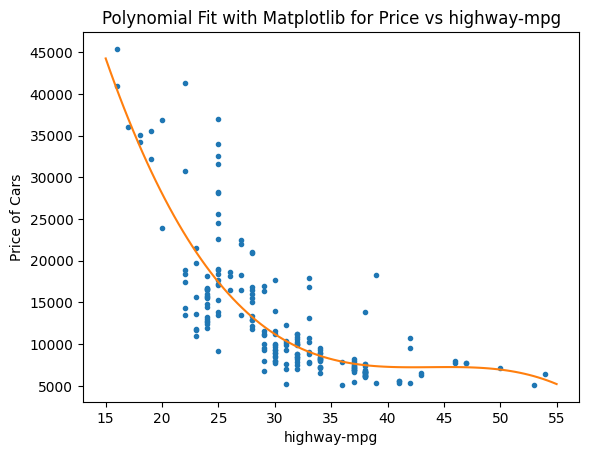

In [67]:
plotpoly(p , x , y , 'highway-mpg')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:

In [68]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [70]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [71]:
X_poly = pr.fit_transform(X)
X_poly

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [72]:
X.shape

(201, 4)

In [73]:
X_poly.shape

(201, 15)

In the original data, there are 201 samples and 4 features. After the transformation, there are 201 samples and 15 features.

#### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [76]:
Input = [
    ('scaler' , StandardScaler()) , 
    ('polynomial' , PolynomialFeatures(degree = 2)) , 
    ('model' , LinearRegression())] 

We input the list as an argument to the pipeline constructor:

In [78]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [80]:
X = X.astype(float)
pipe.fit(X , y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.

In [81]:
ypipe = pipe.predict(X)
ypipe[:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>4. Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

Let's compute R-squared

In [100]:
x = df[['highway-mpg']]
y = df['price']
lm.fit(x , y)
print("The R-square is: " , lm.score(x , y))

The R-square is:  0.4965911884339176


We can say that ~49.66% of the variation in car price is explained by this simple linear model, which we have built using the highway_mpg data.

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [101]:
yhat = lm.predict(x)

In [93]:
from sklearn.metrics import mean_squared_error

In [102]:
print("The MSE is: " , mean_squared_error(y , yhat))

The MSE is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

Let's compute R-squared

In [104]:
lm.fit(X , y)
print("The R-square is: " , lm.score(X , y))

The R-square is:  0.8093562806577457


We can say that ~80.936 % of the variation of price is explained by this multiple linear regression

Let's calculate the MSE:

In [105]:
y_pred_multifit = lm.predict(X)

In [108]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], y_pred_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### R_squared and MSE for the multiple polynomial regression model:

In [109]:
pipe.score(X , y)

0.8463341969864728

In [115]:
mean_squared_error(y , ypipe)

9656613.4039896

#### R_squared and MSE for the  polynomial fit model:

In [111]:
from sklearn.metrics import r2_score

In [112]:
r2_score(y , p(x))

0.674194666390652

In [113]:
mean_squared_error(y , p(x))

20474146.426361218

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

Comparing the models we notice that the multiple polynomial regression has the lowest MSE and the highest R-squared value. we conclude that <b>the Multiple Polynomial Regression model is the best modpiel</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>